# Lab 3 - biblioteka pandas: analiza i wizualizacja danych



In [ ]:
import pandas as pd

In [ ]:
movie: pd.DataFrame = pd.read_csv('movie.csv')

movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Analiza danych

### Rankingowanie obiektów według atrybutu

Operacja ta pozwala na wybór n wierszy, których wartość w wyznaczonej kolumnie jest największa bądź najmniejsza. W tym celu należy skorzystać z metod nlargest lub nsmallest wywoływanych na obiekcie klasy DataFrame, które zwrócą odpowiednio n wierszy o największej lub najmniejszej wartości według wskazanej kolumny. 

Przykład: wybór 10 filmów o największym budżecie:

In [ ]:
movie.nlargest(10, 'budget')[['movie_title', 'budget', 'imdb_score', 'genres', 'title_year']]

,movie_title,budget,imdb_score,genres,title_year
3787,Lady Vengeance,4.200000e+09,7.7,Crime|Drama,2005.0
2955,Fateless,2.500000e+09,7.1,Drama|Romance|War,2005.0
2294,Princess Mononoke,2.400000e+09,8.4,Adventure|Animation|Fantasy,1997.0
2305,Steamboy,2.127520e+09,6.9,Action|Adventure|Animation|Family|Sci-Fi|Thriller,2004.0
3361,Akira,1.100000e+09,8.1,Action|Animation|Sci-Fi,1988.0
4440,Godzilla 2000,1.000000e+09,6.0,Action|Adventure|Drama|Sci-Fi|Thriller,1999.0
3023,Kabhi Alvida Naa Kehna,7.000000e+08,6.0,Drama,2006.0
3779,Tango,7.000000e+08,7.2,Drama|Musical,1998.0
3216,Kites,6.000000e+08,6.0,Action|Drama|Romance|Thriller,2010.0
1325,Red Cliff,5.536320e+08,7.4,Action|Adventure|Drama|History|War,2008.0


W analogiczny sposób można wyszukać 10 filmów o najmniejszym budżecie:

In [ ]:
movie.nsmallest(10, 'budget')[['movie_title', 'budget', 'imdb_score', 'genres', 'title_year']]

,movie_title,budget,imdb_score,genres,title_year
4684,Tarnation,218.0,7.2,Biography|Documentary,2003.0
4915,My Date with Drew,1100.0,6.6,Documentary,2004.0
4913,A Plague So Pleasant,1400.0,6.3,Drama|Horror|Thriller,2013.0
4909,The Mongol King,3250.0,7.8,Crime|Drama,2005.0
4899,Clean,4500.0,6.9,Drama|Music|Romance,2004.0
4906,Primer,7000.0,7.0,Drama|Sci-Fi|Thriller,2004.0
4907,Cavite,7000.0,6.3,Thriller,2005.0
4908,El Mariachi,7000.0,6.9,Action|Crime|Drama|Romance|Thriller,1992.0
4910,Newlyweds,9000.0,6.4,Comedy|Drama,2011.0
4898,Pink Flamingos,10000.0,6.1,Comedy|Crime|Horror,1972.0


Łącząc wywołania obydwu metod można uzyskać podwójny efekt rankingowania obiektów - według dwóch atrybutów. Przykładowo, można wybrać spośród 10 najtańszych filmów, 5 z najwyższą oceną w serwisie IMDB:

In [ ]:
movie.nsmallest(10, 'budget')[['movie_title', 'budget', 'imdb_score', 'genres', 'title_year']].nlargest(5, 'imdb_score')

,movie_title,budget,imdb_score,genres,title_year
4909,The Mongol King,3250.0,7.8,Crime|Drama,2005.0
4684,Tarnation,218.0,7.2,Biography|Documentary,2003.0
4906,Primer,7000.0,7.0,Drama|Sci-Fi|Thriller,2004.0
4899,Clean,4500.0,6.9,Drama|Music|Romance,2004.0
4908,El Mariachi,7000.0,6.9,Action|Crime|Drama|Romance|Thriller,1992.0


### Sortowanie ramek danych

Ramki danych (podobnie jak tabele w bazie danych) można sortować według jednej lub wielu kolumn. Służy do tego metoda sort_values wywoływana na obiekcie klasy DataFrame. 

Przykład: sortowanie malejące filmów według długości (kolumna duration).

In [ ]:
movie.sort_values('duration', ascending=False).head(15)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1694,Color,NaN,16.0,511.0,NaN,51.0,Ingvar Eggert Sigurðsson,147.0,NaN,Crime|Drama|Thriller,Ólafur Darri Ólafsson,Trapped,2308,307,Björn Hlynur Haraldsson,0.0,coastal town|iceland|police|snowstorm|winter s...,http://www.imdb.com/title/tt3561180/?ref_=fn_t...,19.0,Icelandic,Iceland,NaN,NaN,NaN,63.0,8.2,16.00,0
2436,Color,NaN,108.0,334.0,NaN,30.0,Nora von Waldstätten,897.0,145118.0,Biography|Crime|Drama|Thriller,Edgar Ramírez,Carlos,10111,1032,Katharina Schüttler,0.0,opec|pubic hair|revolutionary|terrorism|true c...,http://www.imdb.com/title/tt1321865/?ref_=fn_t...,36.0,English,France,Not Rated,NaN,NaN,30.0,7.7,2.35,0
1487,Color,Taylor Hackford,12.0,330.0,138.0,672.0,Jesse Borrego,848.0,4496583.0,Crime|Drama,Delroy Lindo,"Blood In, Blood Out",23181,3227,Raymond Cruz,2.0,1970s|1980s|barrio|gang war|mexican,http://www.imdb.com/title/tt0106469/?ref_=fn_t...,129.0,English,USA,R,35000000.0,1993.0,674.0,8.0,1.66,6000
1134,Color,Michael Cimino,102.0,325.0,517.0,678.0,Sam Waterston,12000.0,1500000.0,Adventure|Drama|Western,Jeff Bridges,Heaven's Gate,9830,14255,Isabelle Huppert,0.0,1890s|hired gun|immigrant|johnson county war|s...,http://www.imdb.com/title/tt0080855/?ref_=fn_t...,189.0,English,USA,R,44000000.0,1980.0,849.0,6.8,2.35,1000
3254,Color,Chatrichalerm Yukol,31.0,300.0,6.0,6.0,Chatchai Plengpanich,7.0,454255.0,Action|Adventure|Drama|History|War,Sarunyu Wongkrachang,The Legend of Suriyothai,1666,32,Mai Charoenpura,3.0,16th century|burmese|invasion|queen|thailand,http://www.imdb.com/title/tt0290879/?ref_=fn_t...,47.0,Thai,Thailand,R,400000000.0,2001.0,6.0,6.6,1.85,124
2922,Color,Wolfgang Petersen,96.0,293.0,249.0,18.0,Martin Semmelrogge,362.0,11433134.0,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,469,Herbert Grönemeyer,0.0,duty|submarine|submarine movie|tension|u boat,http://www.imdb.com/title/tt0082096/?ref_=fn_t...,426.0,German,West Germany,R,14000000.0,1981.0,21.0,8.4,1.85,11000
1556,Color,Francis Ford Coppola,261.0,289.0,0.0,3000.0,Marlon Brando,11000.0,78800000.0,Drama|War,Harrison Ford,Apocalypse Now,450676,25313,Robert Duvall,1.0,army|green beret|insanity|jungle|vietnam,http://www.imdb.com/title/tt0078788/?ref_=fn_t...,983.0,English,USA,R,31500000.0,1979.0,10000.0,8.5,2.35,19000
2687,Color,NaN,9.0,286.0,NaN,527.0,Tom Hollander,857.0,NaN,Drama|History|Thriller,Anna Silk,The Company,3828,3809,Alessandro Nivola,3.0,cia|mole|revolution|spy|ussr,http://www.imdb.com/title/tt0488352/?ref_=fn_t...,39.0,English,USA,NaN,NaN,NaN,555.0,7.9,1.78,733
874,Color,Ron Maxwell,84.0,280.0,33.0,67.0,Bruce Boxleitner,789.0,12870569.0,Drama|History|War,Billy Campbell,Gods and Generals,13215,1671,John Castle,0.0,confederacy|hero|prequel|stonewall jackson|war...,http://www.imdb.com/title/tt0279111/?ref_=fn_t...,497.0,English,USA,PG-13,56000000.0,2003.0,640.0,6.3,2.35,953
1963,Color,Ron Maxwell,22.0,271.0,33.0,251.0,William Morgan Sheppard,854.0,10769960.0,Drama|History|War,Tom Berenger,Gettysburg,21940,2107,James Patrick Stuart,0.0,american civil war|battle|blood splatter|civil...,http://www.imdb.com/title/tt0107007/?ref_=fn_t...,256.0,English,USA,PG,25000000.0,1993.0,702.0,7.7,1.85,0


W podobny sposób można dokonać sortowania ramki według wielu kolumn. Należy jednak pamiętać o przekazaniu kolekcji nazw kolumn w metodzie sort_values. Poniższy przykład przedstawia sortowanie ramki według kolumny duration malejąco, a następnie według kolumny imdb_score:

In [ ]:
movie.sort_values(['duration', 'imdb_score'], ascending=False)[['movie_title', 'duration', 'imdb_score', 'genres']].head(20)

,movie_title,duration,imdb_score,genres
1694,Trapped,511.0,8.2,Crime|Drama|Thriller
2436,Carlos,334.0,7.7,Biography|Crime|Drama|Thriller
1487,"Blood In, Blood Out",330.0,8.0,Crime|Drama
1134,Heaven's Gate,325.0,6.8,Adventure|Drama|Western
3254,The Legend of Suriyothai,300.0,6.6,Action|Adventure|Drama|History|War
2922,Das Boot,293.0,8.4,Adventure|Drama|Thriller|War
1556,Apocalypse Now,289.0,8.5,Drama|War
2687,The Company,286.0,7.9,Drama|History|Thriller
874,Gods and Generals,280.0,6.3,Drama|History|War
1963,Gettysburg,271.0,7.7,Drama|History|War


### Usuwanie duplikatów

Do usuwania duplikatów (wierszy o takich samych wartościach w wyznaczonej kolumnie) służy metoda drop_duplicates. Metoda (podobnie jak poprzednie) nie zastępuje oryginalnej ramki, lecz zwraca jej zmodyfikowaną kopię, zatem może posłużyć do przefiltrowania, lub pogrupowania oryginalnych danych. Przykładowo, znalezienie najwyżej ocenionego filmu w każdym roku:

In [ ]:
movie[['movie_title', 'imdb_score', 'title_year']].sort_values(['title_year', 'imdb_score'], ascending=False).drop_duplicates(subset='title_year')

,movie_title,imdb_score,title_year
4312,Kickboxer: Vengeance,9.1,2016.0
3745,Running Forever,8.6,2015.0
4369,Queen of the Mountains,8.7,2014.0
3935,"Batman: The Dark Knight Returns, Part 2",8.4,2013.0
3,The Dark Knight Rises,8.5,2012.0
...,...,...,...
2694,Metropolis,8.3,1927.0
4767,The Big Parade,8.3,1925.0
4833,Over the Hill to the Poorhouse,4.8,1920.0
4695,Intolerance: Love's Struggle Throughout the Ages,8.0,1916.0


### Agregacja danych

Agregacja danych polega na grupowaniu wierszy według wyznaczonej kolumny, a następnie na zastosowaniu funkcji agregacyjnej, która obliczy pewne wartości dla wyznaczonych atrybutów w pogrupowanych wierszach. Funkcją agregującą może być np. suma bądź średnia arytmetyczna. Do grupowania wierszy służy metoda groupby wywoływana na obiekcie klasy DataFrame oraz zwraca pogrupowaną ramkę w postaci obiektu klasy DataFrameGroupBy. Do zastosowania funkcji agregujących służy metoda agg wywoływana na obiekcie klasy DataFrameGroupBy.

Przykład: średnia ocena filmu w każdym roku.

In [ ]:
movie.groupby('title_year').agg({'imdb_score': 'mean'}).sort_values('title_year', ascending=False)

,imdb_score
title_year,
2016.0,6.366327
2015.0,6.038863
2014.0,6.244856
2013.0,6.361039
2012.0,6.251402
...,...
1929.0,7.150000
1927.0,8.300000
1925.0,8.300000


W podobny sposób można uzyskać łączny budżet filmów nakręconych przez każdego z reżyserów:

In [ ]:
movie.groupby('director_name').agg({'budget': 'sum'}).sort_values('budget', ascending=False)

,budget
director_name,
Chan-wook Park,4.215000e+09
Katsuhiro Ôtomo,3.227520e+09
Lajos Koltai,2.500000e+09
Hayao Miyazaki,2.477000e+09
Steven Spielberg,1.662901e+09
...,...
John Turturro,0.000000e+00
Jonathan Parker,0.000000e+00
Aaron Hann,0.000000e+00


Analogicznie można uzyskać dla każdego kraju liczbę wyprodukowanych filmów oraz średni i całkowity budżet:

In [ ]:
movie.groupby('country').agg({'budget': ['sum', 'mean'], 'movie_title': 'count'})

budget               movie_title
                               sum          mean       count
country                                                     
Afghanistan           4.600000e+04  4.600000e+04           1
Argentina             5.700000e+06  1.425000e+06           4
Aruba                 3.500000e+07  3.500000e+07           1
Australia             1.423606e+09  2.965845e+07          53
Bahamas               5.000000e+06  5.000000e+06           1
...                            ...           ...         ...
Turkey                8.300000e+06  8.300000e+06           1
UK                    9.660139e+09  2.646613e+07         434
USA                   1.202305e+11  3.520658e+07        3710
United Arab Emirates  1.250000e+05  1.250000e+05           1
West Germany          4.100000e+07  2.050000e+07           3

[65 rows x 3 columns]

### Własne funkcje agregujące

Biblioteka pandas umożliwia wykorzystywanie własnych funkcji podczas agregacji danych. Taka funkcja powinna przyjmować jeden argument w postaci serii danych oraz zwracać dowolną wartośc skalarną.

Przykład: średni wynik filmu uzyskany w każdym roku przy użyciu własnej funkcji agregującej.

In [ ]:
def my_mean(x: pd.Series) -> float:
  return x.sum() / x.count()

In [ ]:
movie.groupby('title_year').agg({'imdb_score': my_mean}).sort_values('title_year', ascending=False)

,imdb_score
title_year,
2016.0,6.366327
2015.0,6.038863
2014.0,6.244856
2013.0,6.361039
2012.0,6.251402
...,...
1929.0,7.150000
1927.0,8.300000
1925.0,8.300000


### Filtrowanie danych

Do filtrowania danych służy metoda query wywoływana na obiekcie klasy DataFrame. Parametrem metody jest konstrukcja [nazwa_kolumny] [operator_logiczny] [wartosc], np. country == "Poland", która pozwala wybrać wszystkie wiersze pasujące do maski.

Przykład: wybór wszystkich filmów autorstwa Jamesa Camerona.

In [ ]:
movie.query('director_name == "James Cameron"')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
285,Color,James Cameron,210.0,153.0,0.0,539.0,Jenette Goldstein,780.0,204843350.0,Action|Sci-Fi,Joe Morton,Terminator 2: Judgment Day,744891,2829,S. Epatha Merkerson,0.0,future|liquid metal|multiple cameos|sexy woman...,http://www.imdb.com/title/tt0103064/?ref_=fn_t...,983.0,English,USA,R,102000000.0,1991.0,604.0,8.5,2.35,13000
288,Color,James Cameron,94.0,141.0,0.0,618.0,Tia Carrere,2000.0,146282411.0,Action|Comedy|Thriller,Jamie Lee Curtis,True Lies,190439,4528,Tom Arnold,0.0,espionage|secret agent|secret mission|spy|spy ...,http://www.imdb.com/title/tt0111503/?ref_=fn_t...,351.0,English,USA,R,115000000.0,1994.0,1000.0,7.2,2.35,0
599,Color,James Cameron,82.0,171.0,0.0,638.0,Todd Graff,2000.0,54222000.0,Adventure|Drama|Sci-Fi|Thriller,Michael Biehn,The Abyss,131217,4074,Mary Elizabeth Mastrantonio,0.0,alien|estranged couple|ocean|submarine|underwater,http://www.imdb.com/title/tt0096754/?ref_=fn_t...,380.0,English,USA,PG-13,69500000.0,1989.0,650.0,7.6,2.35,0
2455,Color,James Cameron,250.0,154.0,0.0,604.0,Carrie Henn,2000.0,85200000.0,Action|Adventure|Sci-Fi,Michael Biehn,Aliens,488537,4228,Jenette Goldstein,1.0,alien|human versus alien|monster|rescue missio...,http://www.imdb.com/title/tt0090605/?ref_=fn_t...,1076.0,English,USA,R,18500000.0,1986.0,626.0,8.4,1.85,18000
3508,Color,James Cameron,204.0,107.0,0.0,255.0,Brian Thompson,2000.0,38400000.0,Action|Sci-Fi,Michael Biehn,The Terminator,600266,3582,Paul Winfield,1.0,cyborg|future war|robot|shootout in a police s...,http://www.imdb.com/title/tt0088247/?ref_=fn_t...,692.0,English,UK,R,6500000.0,1984.0,663.0,8.1,1.85,13000


Łącząc wyrażenia logiczne spójnikami and i or można konstruować złożone maski przeszukiwania danych w ramkach. 

Przykład: wszystkie filmy Jamesa Camerona wyprodukowane przed rokiem 1989.

In [ ]:
movie[['director_name', 'movie_title', 'title_year']].query('director_name == "James Cameron" and title_year < 1989')

,director_name,movie_title,title_year
2455,James Cameron,Aliens,1986.0
3508,James Cameron,The Terminator,1984.0


## Wizualizacja danych

Biblioteka pandas udostępnia wygodny interfejs służący do wizualizacji danych znajdujących się w ramkach. Metody generujące wykresy w bibliotece pandas wykorzystują "pod spodem" bibliotekę matplotlib. W celu poprawnej prezentacji wykresu (niezależnie od środowiska) należy również zaimportować bibliotekę matplotlib. 



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

### Wykres liniowy

Najprostszą wersję wykresu liniowego można uzyskać wywołując metodę plot na serii danych. Wówczas na osi x wykresu znajdą się wartości pochodzące z indeksu wierszy prezentowanej ramki lub serii, a na osi y znajdą się docelowe wartości.

Przykład: wykres liniowy średniej długości filmu według roku

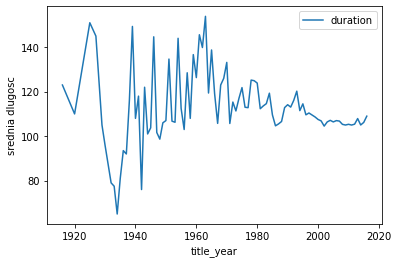

In [ ]:
ax: plt.Axes = movie.groupby('title_year').agg({'duration': 'mean'}).plot()
ax.set_ylabel('srednia dlugosc')

plt.show()

Biblioteka pandas umożliwia również wizualizację liniową ramek, gdzie wartości zostaną przedstawione w postaci kilku nakładających się wykresów liniowych.

Przykład: średnia długość oraz liczba filmów według roku.

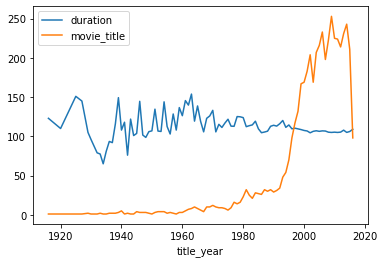

In [ ]:
ax: plt.Axes = movie.groupby('title_year').agg({'duration': 'mean', 'movie_title': 'count'}).plot()

plt.show()

### Wykres kolumnowy

Do tworzenia wykresów kolumnowych w bibliotece pandas służy metoda bar.

Przykład: wykres kolumnowy średniej oceny filmu dla każdego języka

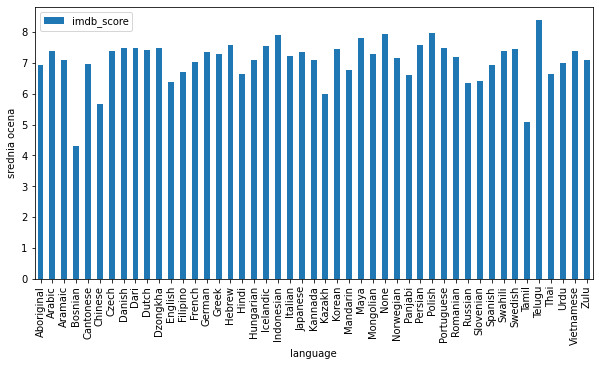

In [ ]:
ax: plt.Axes = movie.groupby('language').agg({'imdb_score': 'mean'}).plot.bar(figsize=(10, 5))
ax.set_ylabel('srednia ocena')

plt.show()

### Wykres kołowy

Do utworzenia wykresu kołowego służy metoda pie.

Przykład: wykres kołowy przedstawiający udział filmów kolorowych i czarno-białych pośród wszystkich filmów

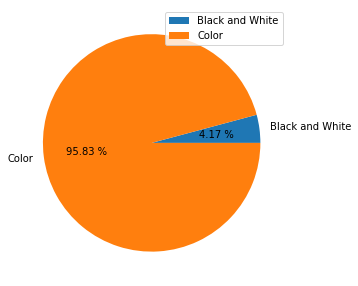

In [ ]:
ax: plt.Axes = movie.groupby('color').agg({'color': 'count'}).plot.pie(subplots=True, autopct='%.2f %%', ylabel='', figsize=(5, 5))

plt.show()

## Zadania

1. Wczytać do ramki dane z pliku movie.csv.
2. Przygotować wykres słupkowy, w którym na osi x znajdzie się 10 lat, w których wystąpił najwyższy średni budżet filmów. Nadać tytuł osi y: "budget".
3. Przygotować wykres słupkowy przedstawiający oceny 20 najtańszych filmów. Na osi x umieścić tytuły filmów, a na osi y umieścić średnią ocenę.
4. Przygotować wykres liniowy przedstawiający sumę wartości w kolumnach: actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes w każdym roku.
5. Przygotować wykres liniowy przedstawiający zsumowane wartości w każdym roku dla kolumn: cast_total_facebook_likes oraz movie_facebook_likes dla wszystkich filmów, których budżet mieści się w przedziale [m-s, m+s], gdzie m oznacza średni budżet, a s oznacza odchylenie standardowe budżetu.
6. Przygotować wykres kołowy przedstawiający udział każdego reżysera w 20 najdroższych filmach.